### PROJECT: MOVIE RECOMMENDER SYSTEM

### Problem Statement: In today’s streaming era, users face decision fatigue. With thousands of movies available, how do you find your next favorite movie without endlessly scrolling? 

This project aims to solve that by recommending similar movies using only their metadata — no user tracking required.


#### DATA SOURCE- KAGGLE 

In [1]:
#import library
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
movie = pd.read_csv('IMDB-Movie-Data (1).csv') 

In [3]:
movie.head() 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
movie.shape

(1000, 12)

In [5]:
movie.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
# Display  information
movie.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
movie.columns 

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

## DATA CLEANING AND PREPROCESSING

In [8]:
# check for missing values
movie.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

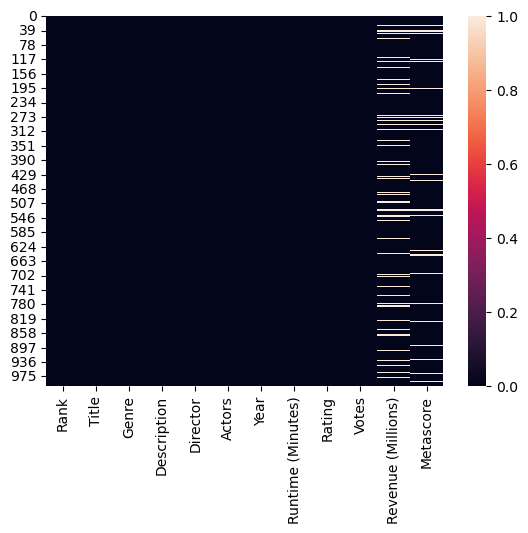

In [9]:
# Visualize missing values
sns.heatmap(movie.isnull())
plt.show()

In [10]:
# Display Percentage of Missing values
pct_missing_values = movie.isnull().sum() *100 / len(movie)

In [11]:
pct_missing_values

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

The Revenue coulumns has about 13 percent in  missing values and about 7 percent of Metascore missing values

In [12]:
# Now Drop all the missing values
movie.dropna(axis=0, inplace=True)

In [13]:
# use the shape attribute to ascertain modification
movie.shape

(838, 12)

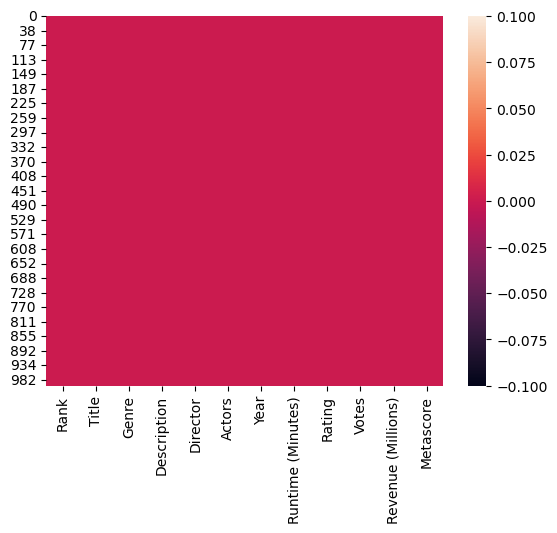

In [14]:
# Recheck the  heatmap 
sns.heatmap(movie.isnull())
plt.show()

In [15]:
# Check for Data Duplicates
Dup_data = movie.duplicated().any()

In [16]:
Dup_data

False

# EXPLORATORY DATA ANALYSIS(EDA)

### Check Overal Statistics of Dataset

In [17]:
movie.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


## Display year with the highest revenue

In [18]:
movie.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

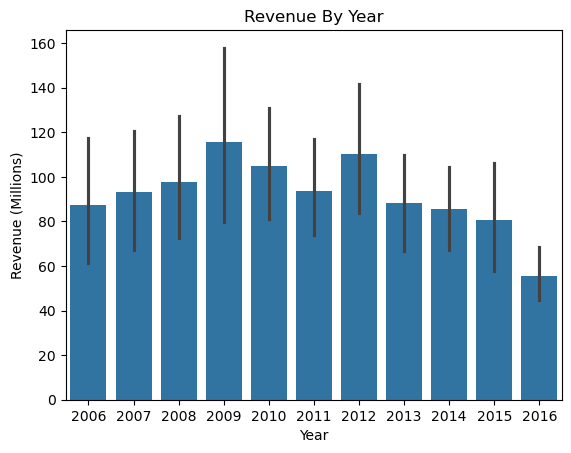

In [19]:
# Visualize outcome
sns.barplot(x='Year', y='Revenue (Millions)', data=movie)
plt.title('Revenue By Year')
plt.show()

The Highest Revenue was in the year 2009 with $115,742000

In [20]:
# What is the average rating for each Director
movie.groupby('Director')['Rating'].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam McKay             7.00
Adam Shankman          6.30
Adam Wingard           5.90
                       ... 
Xavier Dolan           8.10
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 524, dtype: float64

## What are the Top 10 Lengthy Movies Title and Runtime

In [21]:
top10lenghty = movie.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')
top10lenghty 

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


## Visualize the top 10 lenghty movies

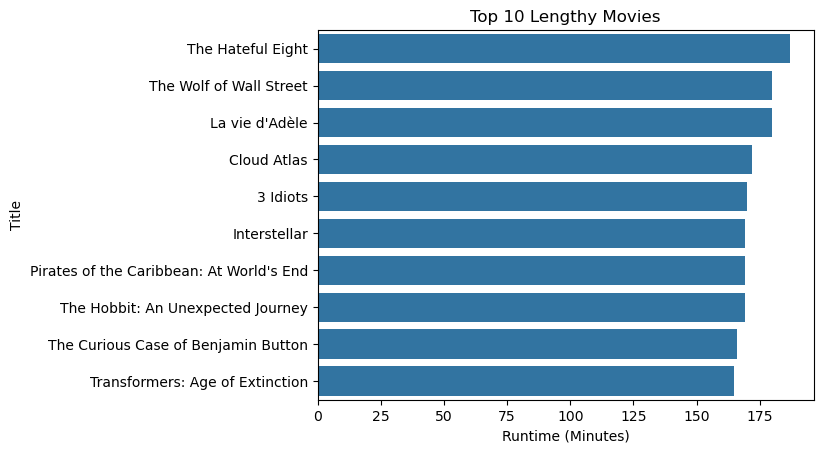

In [22]:
sns.barplot(x= 'Runtime (Minutes)', y=top10lenghty.index, data=top10lenghty)
plt.title('Top 10 Lengthy Movies')
plt.show()

## What is the total number of movies per year

In [23]:
movie['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

## Visualize the total movies made per year

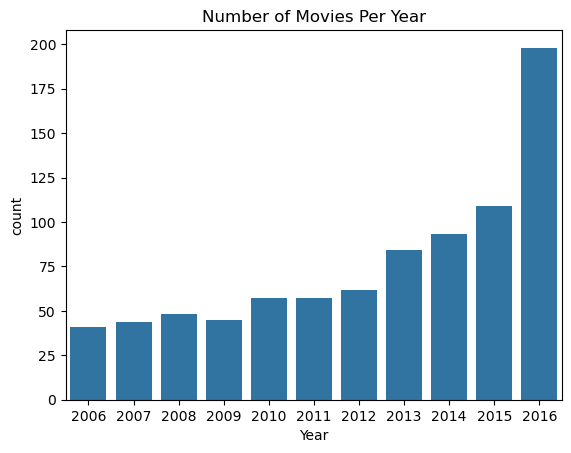

In [24]:
sns.countplot(x='Year', data=movie)
plt.title('Number of Movies Per Year')
plt.show()

## Display the Top 10 highest-rated movies Titles and Its Directors

In [25]:
top10Rated = movie.nlargest(10, 'Rating')[['Title', 'Rating', 'Director']].set_index('Title')
top10Rated 

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


### VISUALIZE

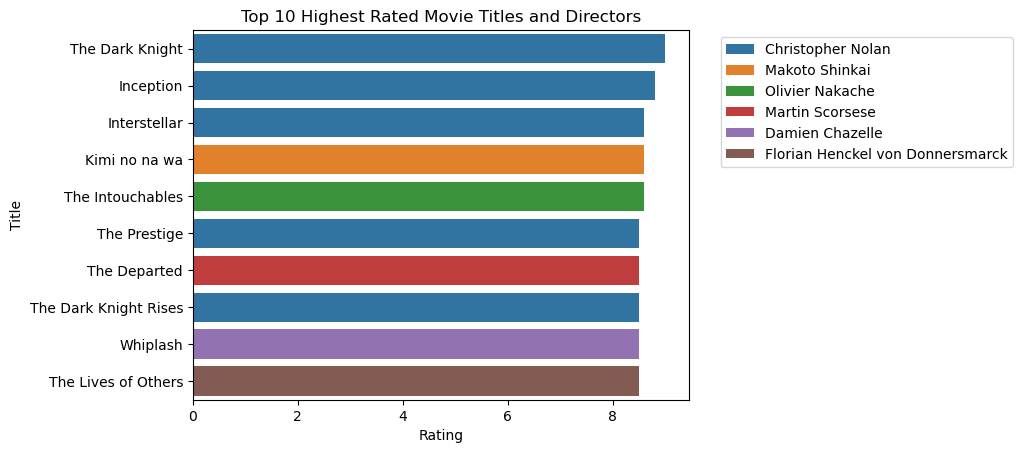

In [26]:
sns.barplot(x='Rating', y=top10Rated.index, data=top10Rated, hue='Director')
plt.title('Top 10 Highest Rated Movie Titles and Directors')
plt.legend(bbox_to_anchor =(1.05,1), loc=2)
plt.show()

## What are the Top Highest Revenue Movie Titles

In [27]:
movie.nlargest(10, 'Revenue (Millions)')['Title']

50     Star Wars: Episode VII - The Force Awakens
87                                         Avatar
85                                 Jurassic World
76                                   The Avengers
54                                The Dark Knight
12                                      Rogue One
119                                  Finding Dory
94                        Avengers: Age of Ultron
124                         The Dark Knight Rises
578               The Hunger Games: Catching Fire
Name: Title, dtype: object

### Assign a Varible and Set the Title as index

In [28]:
Top10 = movie.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')
Top10

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


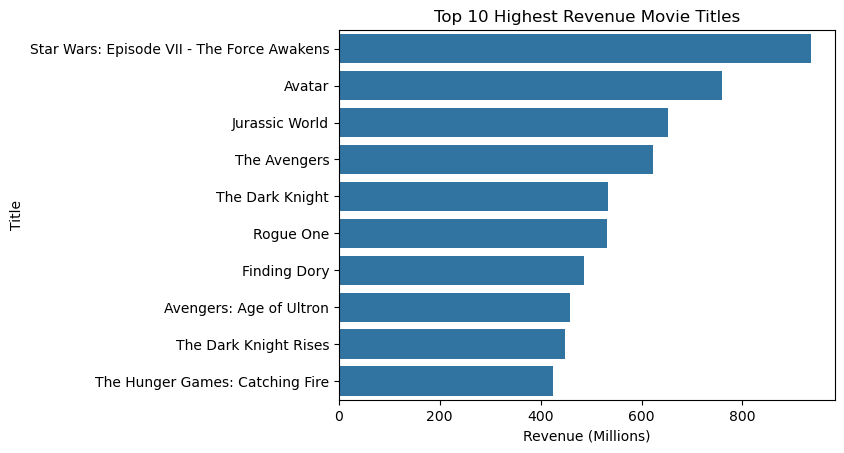

In [29]:
sns.barplot(x='Revenue (Millions)', y= Top10.index, data=Top10)
plt.title('Top 10 Highest Revenue Movie Titles')
plt.show()

Combine Categorical Features

Create a new feature that combines Genre + Description + Director + Actor into one text string. 


Purpose: This will allow the recommender to compare movies based on these fields.

In [30]:
movie['Combined_Features'] =  movie['Genre'] + ' ' + movie['Description'] + ' ' + movie['Director'] + ' ' + movie['Actors']


In [31]:
movie.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Combined_Features
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"Action,Adventure,Sci-Fi A group of intergalact..."


## Convert Combined Features to Numerical Values for Similarity Calculations

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie['Combined_Features'])


## Compute Similarity Matrix using cosine similarity to find how similar two movies are based on their text features.

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


#### Building Recommender Function

In [34]:
# Reset index properly
movie = movie.reset_index(drop=True)

# Map movie titles to their index
indices = pd.Series(movie.index, index=movie['Title'])

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # top 10 recommendations

    movie_indices = [i[0] for i in sim_scores]
    return movie['Title'].iloc[movie_indices]


In [35]:
print(get_recommendations('The Dark Knight'))


108                  The Dark Knight Rises
54                            The Prestige
700    The Imaginarium of Doctor Parnassus
563                         Public Enemies
404                     Revolutionary Road
188                   Thor: The Dark World
376                      London Has Fallen
31                            Interstellar
668                             Mr. Brooks
149                               13 Hours
Name: Title, dtype: object


In [36]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Dataset
movie = pd.read_csv('IMDB-Movie-Data (1).csv')

# Fill missing values in text columns
movie['Genre'] = movie['Genre'].fillna('')
movie['Description'] = movie['Description'].fillna('')
movie['Actors'] = movie['Actors'].fillna('')
movie['Director'] = movie['Director'].fillna('')

# Combine features for content-based recommendation
movie['combined_features'] = (
    movie['Genre'] + " " +
    movie['Description'] + " " +
    movie['Actors'] + " " +
    movie['Director']
)

# Vectorize the text
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie['combined_features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Build title index mapping
indices = pd.Series(movie.index, index=movie['Title']).drop_duplicates()

#  Recommendation Function
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return ["Movie not found in database. Try another."]
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movie['Title'].iloc[movie_indices].tolist()

# GUI
def recommend_movies():
    user_input = combo.get()
    recommendations = get_recommendations(user_input)
    result_text.delete("1.0", tk.END)  # Clear previous results
    if recommendations[0] == "Movie not found in database. Try another.":
        result_text.insert(tk.END, recommendations[0])
    else:
        result_text.insert(tk.END, f"Top Recommendations for '{user_input}':\n\n")
        for movie in recommendations:
            result_text.insert(tk.END, f"- {movie}\n")

# Create main window
root = tk.Tk()
root.title("Movie Recommender System")

# Title Label
tk.Label(root, text='Movie Recommender System', 
         font=("Arial", 16, "bold"), fg="blue").pack(pady=10)

# Dropdown Label
tk.Label(root, text="Select a Movie:", font=("Arial", 12)).pack()

# Dropdown (Combobox)
combo = ttk.Combobox(root, values=sorted(movie['Title'].unique().tolist()), width=50)
combo.pack(pady=5)
combo.set("Select a movie...")  # Default placeholder

# Button
tk.Button(root, text="Get Recommendations", 
          command=recommend_movies, 
          bg="green", fg="white", font=("Arial", 12)).pack(pady=10)

# Output Box
result_text = tk.Text(root, height=12, width=60, font=("Arial", 12))
result_text.pack(pady=10)

# Run app
root.mainloop()
